In [27]:
import datetime
import time as time_module
import sys
import os 
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import theano
import matplotlib
import pymc3 as pm
import theano.tensor as tt



try: 
    import covid19_inference as cov19
except ModuleNotFoundError:
    sys.path.append('../..')
    import covid19_inference as cov19

path_to_save = '../../figures/'
path_save_pickled = '../../data/'
rerun = True

In [28]:

confirmed_cases = cov19.get_jhu_confirmed_cases()

country = 'Germany'
date_data_begin = datetime.datetime(2020,3,1)
# date_data_end   = cov19.get_last_date(confirmed_cases)
date_data_end = datetime.datetime(2020,4,21)

#date_data_end   = datetime.datetime(2020,3,28)
num_days_data = (date_data_end-date_data_begin).days
diff_data_sim = 16 # should be significantly larger than the expected delay, in 
                   # order to always fit the same number of data points.
num_days_future = 28
date_begin_sim = date_data_begin - datetime.timedelta(days = diff_data_sim)
date_end_sim   = date_data_end   + datetime.timedelta(days = num_days_future)
num_days_sim = (date_end_sim-date_begin_sim).days


cases_obs = cov19.filter_one_country(confirmed_cases, country,
                                     date_data_begin, date_data_end)

print('Cases yesterday ({}): {} and '
      'day before yesterday: {}'.format(date_data_end.isoformat(), *cases_obs[:-3:-1]))

prior_date_mild_dist_begin =  datetime.datetime(2020,3,9)
prior_date_strong_dist_begin =  datetime.datetime(2020,3,16)
prior_date_contact_ban_begin =  datetime.datetime(2020,3,23)

change_points = [dict(pr_mean_date_begin_transient = prior_date_mild_dist_begin,
                      pr_sigma_date_begin_transient = 3,
                      pr_median_lambda = 0.2,
                      pr_sigma_lambda = 0.5),
                 dict(pr_mean_date_begin_transient = prior_date_strong_dist_begin,
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = 1/8,
                      pr_sigma_lambda = 0.5),
                 dict(pr_mean_date_begin_transient = prior_date_contact_ban_begin,
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = 1/8/2,
                      pr_sigma_lambda = 0.5)]
if rerun:

    traces = []
    models = []
    for num_change_points in range(4):
        model = cov19.SIR_with_change_points(new_cases_obs = np.diff(cases_obs),
                                            change_points_list = change_points[:num_change_points],
                                            date_begin_simulation = date_begin_sim,
                                            num_days_sim = num_days_sim,
                                            diff_data_sim = diff_data_sim,
                                            N = 83e6,
                                            priors_dict=None,
                                            weekends_modulated=False)
        models.append(model)
        traces.append(pm.sample(model=model, init='advi', draws=4000, tune=1000))


    pickle.dump([models, traces], open(path_save_pickled + 'SIR_without_sine2.pickled', 'wb'))

else: 
    models, traces = pickle.load(open(path_save_pickled + 'SIR_without_sine2.pickled', 'rb'))

    

Cases yesterday (2020-04-21T00:00:00): 148291 and day before yesterday: 147065
pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 513.71:   6%|▋         | 12942/200000 [00:20<05:01, 620.85it/s]
Convergence achieved at 13000
Interrupted at 12,999 [6%]: Average Loss = 704.99
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_obs, delay, mu, lambda_0, I_begin]
Sampling 4 chains, 136 divergences: 100%|██████████| 20000/20000 [04:21<00:00, 76.37draws/s] 
There were 37 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 91 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7070661741253055, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
pr_median_transient_len of change point 0 was set to default value 3
pr_sigma_transient_len of change point 0 was set to default value 0.3


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 498.5:   7%|▋         | 13571/200000 [00:22<05:10, 601.23it/s] 
Convergence achieved at 13600
Interrupted at 13,599 [6%]: Average Loss = 660.63
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_obs, delay, mu, transient_len_0, transient_begin_0, lambda_1, lambda_0, I_begin]
Sampling 4 chains, 3 divergences: 100%|██████████| 20000/20000 [16:36<00:00, 20.08draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
pr_median_transient_len of change point 1 was set to default value 3
pr_sigma_transient_len of change point 1 was set to default value 0.3


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 489.13:   7%|▋         | 14648/200000 [00:24<05:07, 602.49it/s]
Convergence achieved at 14700
Interrupted at 14,699 [7%]: Average Loss = 628.29
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_obs, delay, mu, transient_len_1, transient_len_0, transient_begin_1, transient_begin_0, lambda_2, lambda_1, lambda_0, I_begin]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [17:09<00:00, 19.43draws/s]
The number of effective samples is smaller than 25% for some parameters.


pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
pr_median_transient_len of change point 2 was set to default value 3
pr_sigma_transient_len of change point 2 was set to default value 0.3


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 491.89:   7%|▋         | 13271/200000 [00:23<05:27, 570.49it/s]
Convergence achieved at 13300
Interrupted at 13,299 [6%]: Average Loss = 641.63
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_obs, delay, mu, transient_len_2, transient_len_1, transient_len_0, transient_begin_2, transient_begin_1, transient_begin_0, lambda_3, lambda_2, lambda_1, lambda_0, I_begin]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [16:12<00:00, 20.56draws/s]


In [33]:
exec(open('figures_revised_old_layout.py').read())


140748.7950797524


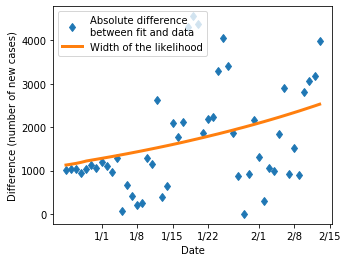

In [34]:
trace = traces[0]
fig, ax = plt.subplots(figsize=(5,4))
time = np.arange(-len(cases_obs)+1, 0)
mpl_dates = conv_time_to_mpl_dates(time) 
ax.plot(mpl_dates, np.abs(np.median(trace.new_cases[:, :num_days_data], axis=0) - np.diff(cases_obs)), 
        'd', markersize=6,
         label='Absolute difference\n'
               'between fit and data')
ax.plot(mpl_dates, np.sqrt(np.median(trace.new_cases[:, :num_days_data], axis=0))*np.median(trace.sigma_obs, axis=0),
         label='Width of the likelihood', lw=3)
ax.set_ylabel('Difference (number of new cases)')
ax.set_xlabel('Date')
ax.legend(loc='upper left')
print(np.median(np.sum(trace.new_cases[:, :num_days_data], axis=1)+ trace.I_begin))
#plt.tight_layout()
ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%-m/%-d'))


4 4


/scratch.local/jdehning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2016: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.WeekdayLocator'>


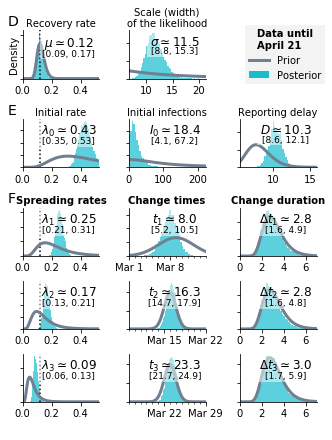

In [35]:
print(len(models), len(traces))
create_figure_distributions(models[3], traces[3],
                              additional_insets = None, xlim_lambda = (0, 0.53), color = 'tab:cyan',
                              num_changepoints=3, xlim_tbegin=7, save_to = path_to_save +'Fig_SIR_without_sine_weekend_dist')


(<Figure size 288x432 with 5 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9399fbf90>,
       dtype=object))

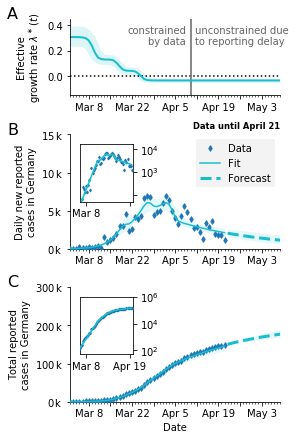

In [36]:
create_figure_timeseries(traces[3], 'tab:cyan',
                       plot_red_axis=True, save_to = path_to_save +'Fig_SIR_without_sine_weekend_cases')


In [31]:
print('\n0 step model\n')
print(pm.loo(traces[0], models[0]))

print('\n1 step model\n')
print(pm.loo(traces[1], models[1]))

print('\n2 steps model\n')
print(pm.loo(traces[2], models[2]))

print('\n3 steps model\n')
print(pm.loo(traces[3], models[3]))


0 step model



/scratch.local/jdehning/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:527: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "


Computed from 16000 by 51 log-likelihood matrix

       Estimate       SE
IC_loo   927.02     9.97
p_loo      8.41        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       50   98.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         1    2.0%
   (1, Inf)   (very bad)    0    0.0%


1 step model

Computed from 16000 by 51 log-likelihood matrix

       Estimate       SE
IC_loo   834.70    16.18
p_loo      8.08        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       51  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%


2 steps model

Computed from 16000 by 51 log-likelihood matrix

       Estimate       SE
IC_loo   819.83    17.58
p_loo     11.92        -
------

Pareto k diagnostic values:
                         Count 

IndexError: list index out of range

In [28]:
for j in range(4):
    print(f'lambda* {j}')   
    print(print_median_CI(traces[0][f"lambda_{j}"] - traces[0].mu, prec=2))

lambda* 0
Median: 0.31
CI: [0.23, 0.39]
lambda* 1
Median: 0.13
CI: [0.09, 0.17]
lambda* 2
Median: 0.04
CI: [0.01, 0.07]
lambda* 3
Median: -0.03
CI: [-0.05, -0.02]
